### Simple ModelGrid Demo

This demo shows how the ModelGrid classes can work, where all model grid functionality is in the model grid class.  Only the geographic reference information and related methods remain in SpatialReference.

In [1]:
%matplotlib inline
import os, sys
import numpy as np
# run installed version of flopy or add local path
try:
    from flopy.discretization.structuredgrid import StructuredGrid
    from flopy.utils.reference import SpatialReference
except:
    fpth = os.path.abspath(os.path.join('..', '..'))
    sys.path.append(fpth)
    from flopy.discretization.structuredgrid import StructuredGrid
    from flopy.utils.reference import SpatialReference

import matplotlib.pyplot as plt


In [2]:
tmpdir = 'tmp'
if not os.path.isdir(tmpdir):
    os.makedirs(tmpdir)

Technically you need to create both a SpatialReference object and a ModelGrid object, but in practice the code looks very similar and can easily be implemented in one line.

In [3]:
mg = StructuredGrid(delc=np.ones(10), delr=np.ones(10), xoff=10, yoff=10, angrot=20, 
                    epsg=26715, lenuni=1)

### Transform, xcenters, xedges

Transform, xcenters, xedges behaves the same but is now a method of the ModelGrid, but has the same functionatily. 

In [4]:
mg.get_coords(10, 10)

(15.976724774602399, 22.81712764111577)

In [5]:
mg.get_local_coords(11.82170571129881, 13.906660505012088)

(3.0479999999999983, 3.048000000000002)

Methods to get cell centers of cells from the model grid are now in the ModelGrid classes.

In [6]:
mg.xcellcenters[1, 7] # x-coordinate at row 1, column 7

14.140523437626127

In [7]:
mg.xcellcenters[[1, 3], [7, 7]]

array([14.14052344, 14.82456372])

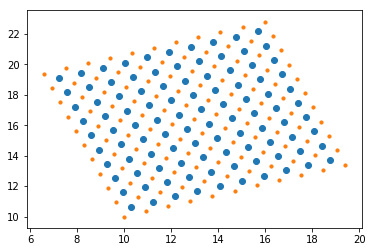

In [8]:
plt.scatter(mg.xcellcenters.ravel(), mg.ycellcenters.ravel())
plt.scatter(mg.xyzvertices[0].ravel(), mg.xyzvertices[1].ravel(), s=10)

### Model Coordinates

The model grid outputs everything in model coordinates if reference information is not given.

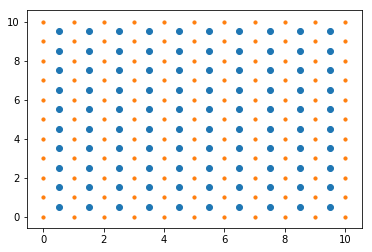

In [9]:
mg.set_coord_info()
plt.scatter(mg.xcellcenters.ravel(), mg.ycellcenters.ravel())
plt.scatter(mg.xyzvertices[0].ravel(), mg.xyzvertices[1].ravel(), s=10)

### Grid lines

In [10]:
def plot_lines(lines):
    fig, ax = plt.subplots()
    for ln in lines:
        plt.plot([ln[0][0], ln[1][0]], [ln[0][1], ln[1][1]])

(11, -1)

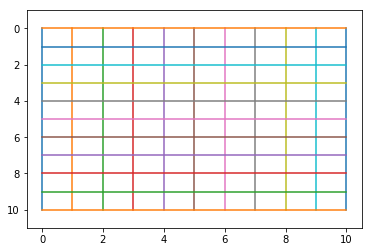

In [11]:
plot_lines(mg.grid_lines)
plt.ylim(11, -1)

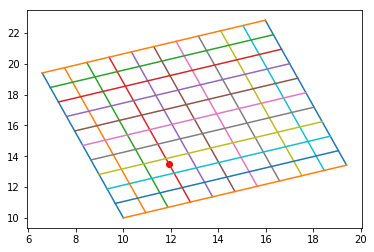

In [12]:
mg.set_coord_info(xoff=10, yoff=10, angrot=20, epsg=26715)
plot_lines(mg.grid_lines)
plt.scatter(11.9, 13.5, c='r')

### Vertices

In [13]:
mg.set_coord_info()
mg.xyzvertices[0]

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

In [14]:
mg.set_coord_info(xoff=10, yoff=10, angrot=20, epsg=26715)
mg.xyzvertices[0]

array([[ 6.57979857,  7.51949119,  8.45918381,  9.39887643, 10.33856905,
        11.27826167, 12.21795429, 13.15764691, 14.09733953, 15.03703215,
        15.97672477],
       [ 6.92181871,  7.86151133,  8.80120395,  9.74089657, 10.68058919,
        11.62028181, 12.55997443, 13.49966706, 14.43935968, 15.3790523 ,
        16.31874492],
       [ 7.26383885,  8.20353147,  9.14322409, 10.08291672, 11.02260934,
        11.96230196, 12.90199458, 13.8416872 , 14.78137982, 15.72107244,
        16.66076506],
       [ 7.605859  ,  8.54555162,  9.48524424, 10.42493686, 11.36462948,
        12.3043221 , 13.24401472, 14.18370734, 15.12339996, 16.06309258,
        17.0027852 ],
       [ 7.94787914,  8.88757176,  9.82726438, 10.766957  , 11.70664962,
        12.64634224, 13.58603486, 14.52572749, 15.46542011, 16.40511273,
        17.34480535],
       [ 8.28989928,  9.2295919 , 10.16928452, 11.10897715, 12.04866977,
        12.98836239, 13.92805501, 14.86774763, 15.80744025, 16.74713287,
        17.686